## Load Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('./Social_Network_Ads.csv')

In [95]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [96]:
df.shape

(400, 5)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [98]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [99]:
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [100]:
df.drop('User ID',axis=1,inplace=True)

In [101]:
col=df.columns
col

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [102]:
X=df.drop('Purchased',axis=1)
Y=df['Purchased']

In [103]:
minmax=MinMaxScaler()
data=minmax.fit_transform(X)

In [104]:
scale=StandardScaler()
data=scale.fit_transform(data)

In [105]:
df = pd.DataFrame(data)
df = pd.concat([df,Y],axis=1)
df.columns=col

In [106]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,-0.980196,0.797057,-0.844019,1
396,1.020204,1.274623,-1.372587,1
397,-0.980196,1.179110,-1.460681,1
398,1.020204,-0.158074,-1.078938,0
399,-0.980196,1.083596,-0.990844,1


In [107]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,4.000000e+02,4.000000e+02,400.000000
mean,8.881784e-18,-2.842171e-16,5.329071e-17,0.357500
std,1.001252e+00,1.001252e+00,1.001252e+00,0.479864
min,-9.801961e-01,-1.877311e+00,-1.607506e+00,0.000000
25%,-9.801961e-01,-7.550313e-01,-7.852897e-01,0.000000
50%,-9.801961e-01,-6.256110e-02,7.561451e-03,0.000000
75%,1.020204e+00,7.970571e-01,5.361289e-01,1.000000
max,1.020204e+00,2.134241e+00,2.356750e+00,1.000000


In [108]:
df = shuffle(df,random_state=56).reset_index(drop=True)

In [109]:
X=df.drop('Purchased',axis=1)
Y=df['Purchased']

In [110]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,
                                               test_size=0.2,random_state=100)

In [111]:
log_reg=LogisticRegression(random_state=100)
log_reg.fit(train_x,train_y)

LogisticRegression(random_state=100)

In [112]:
p=log_reg.predict(test_x)

In [113]:
accuracy_score(test_y,p)

0.8875

In [114]:
print(classification_report(test_y,p))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        52
           1       0.88      0.79      0.83        28

    accuracy                           0.89        80
   macro avg       0.89      0.86      0.87        80
weighted avg       0.89      0.89      0.89        80



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

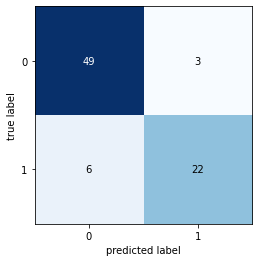

In [115]:
plot_confusion_matrix(confusion_matrix(test_y,p))